# BankNote Data Authentication

Date: 2/9/22

Max Rivera

Dataset from https://archive.ics.uci.edu/ml/datasets/banknote+authentication

Data includes features extracted from images of banknotes, with classes indicating either fraudulent or authentic. I build a shallow neural network to predict the class of each banknote. 

In [25]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix

### Load Dataset

In [2]:
df = pd.read_csv('data_banknote_authentication.txt',header=None) 
df

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


Our csv file does not have headers for features, so we need to add them. 

In [3]:
df.columns = ['variance','skewness','curtosis','entropy','class']
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


### Exploratory Data Analysis

<AxesSubplot:xlabel='class', ylabel='count'>

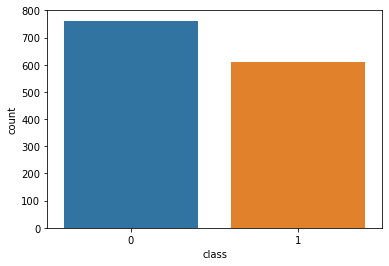

In [32]:
# look at how balanced classes are
sns.countplot(x='class', data=df)

The data is balanced enough to use metrics like accuracy. 

<AxesSubplot:>

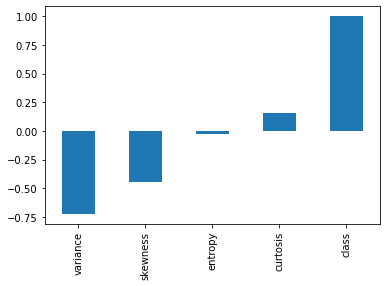

In [5]:
# correlation of features to class
df.corr()['class'].sort_values().plot(kind='bar')

Some of the features aren't highly correlated with the output, but I don't know exactly how
they'll be used inside a non-linear model, so I keep them. 

<AxesSubplot:>

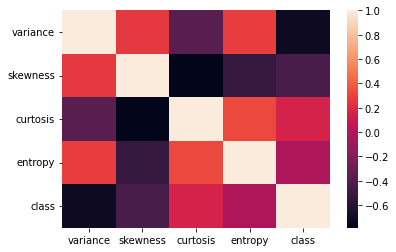

In [6]:
# correlation of features with eachother
sns.heatmap(df.corr())

A heatmap shows how features correlated with eachother. Entropy, which has a pretty low correlation with the 
the output (around 0), has slightly higher correlation with other features. This could be useful.

In [7]:
# check if there are any null values in each column
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

Fortunately the dataset does not contain any missing data. 

### Train Test Split

In [33]:
# separate data from labels 
X = df.drop('class',axis=1)
y = df['class']

In [34]:
X

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [35]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64

In [36]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

### Normalization

In [43]:
# min-max scaling is a typical normalization technique used 
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
X_train.shape

(1029, 4)

### Create Model

In [45]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

### Train Model

In [46]:
# make sure inputs to model.fit are all numpy arrays 
print('X_train',type(X_train))
print('y_train',type(y_train))
print('X_test',type(X_test))
print('y_test',type(y_test))

X_train <class 'numpy.ndarray'>
y_train <class 'numpy.ndarray'>
X_test <class 'numpy.ndarray'>
y_test <class 'numpy.ndarray'>


In [47]:
y_train = np.array(y_train)
print('y_train',type(y_train))
y_test = np.array(y_test)
print('y_test',type(y_test))

y_train <class 'numpy.ndarray'>
y_test <class 'numpy.ndarray'>


In [48]:
model.fit(x=X_train,y=y_train, epochs=600,validation_data=(X_test,y_test))

Train on 1029 samples, validate on 343 samples
Epoch 1/600
1029/1029 [==============================] - 1s 611us/sample - loss: 0.6738 - val_loss: 0.6638
Epoch 2/600
1029/1029 [==============================] - 0s 62us/sample - loss: 0.6582 - val_loss: 0.6455
Epoch 3/600
1029/1029 [==============================] - 0s 65us/sample - loss: 0.6435 - val_loss: 0.6313
Epoch 4/600
1029/1029 [==============================] - 0s 59us/sample - loss: 0.6337 - val_loss: 0.6219
Epoch 5/600
1029/1029 [==============================] - 0s 58us/sample - loss: 0.6267 - val_loss: 0.6146
Epoch 6/600
1029/1029 [==============================] - 0s 58us/sample - loss: 0.6208 - val_loss: 0.6081
Epoch 7/600
1029/1029 [==============================] - 0s 57us/sample - loss: 0.6149 - val_loss: 0.6027
Epoch 8/600
1029/1029 [==============================] - 0s 58us/sample - loss: 0.6093 - val_loss: 0.5967
Epoch 9/600
1029/1029 [==============================] - 0s 58us/sample - loss: 0.6035 - val_loss: 0.590

1029/1029 [==============================] - 0s 58us/sample - loss: 0.1555 - val_loss: 0.1475
Epoch 78/600
1029/1029 [==============================] - 0s 58us/sample - loss: 0.1531 - val_loss: 0.1421
Epoch 79/600
1029/1029 [==============================] - 0s 57us/sample - loss: 0.1499 - val_loss: 0.1402
Epoch 80/600
1029/1029 [==============================] - 0s 57us/sample - loss: 0.1469 - val_loss: 0.1376
Epoch 81/600
1029/1029 [==============================] - 0s 57us/sample - loss: 0.1440 - val_loss: 0.1338
Epoch 82/600
1029/1029 [==============================] - 0s 57us/sample - loss: 0.1414 - val_loss: 0.1346
Epoch 83/600
1029/1029 [==============================] - 0s 58us/sample - loss: 0.1395 - val_loss: 0.1292
Epoch 84/600
1029/1029 [==============================] - 0s 58us/sample - loss: 0.1364 - val_loss: 0.1258
Epoch 85/600
1029/1029 [==============================] - 0s 57us/sample - loss: 0.1346 - val_loss: 0.1258
Epoch 86/600
1029/1029 [==========================

1029/1029 [==============================] - 0s 58us/sample - loss: 0.0544 - val_loss: 0.0447
Epoch 154/600
1029/1029 [==============================] - 0s 58us/sample - loss: 0.0538 - val_loss: 0.0445
Epoch 155/600
1029/1029 [==============================] - 0s 60us/sample - loss: 0.0536 - val_loss: 0.0435
Epoch 156/600
1029/1029 [==============================] - 0s 57us/sample - loss: 0.0530 - val_loss: 0.0431
Epoch 157/600
1029/1029 [==============================] - 0s 57us/sample - loss: 0.0524 - val_loss: 0.0427
Epoch 158/600
1029/1029 [==============================] - 0s 62us/sample - loss: 0.0518 - val_loss: 0.0422
Epoch 159/600
1029/1029 [==============================] - 0s 60us/sample - loss: 0.0512 - val_loss: 0.0415
Epoch 160/600
1029/1029 [==============================] - 0s 59us/sample - loss: 0.0513 - val_loss: 0.0414
Epoch 161/600
1029/1029 [==============================] - 0s 57us/sample - loss: 0.0501 - val_loss: 0.0408
Epoch 162/600
1029/1029 [=================

Epoch 229/600
1029/1029 [==============================] - 0s 61us/sample - loss: 0.0272 - val_loss: 0.0200
Epoch 230/600
1029/1029 [==============================] - 0s 60us/sample - loss: 0.0270 - val_loss: 0.0199
Epoch 231/600
1029/1029 [==============================] - 0s 60us/sample - loss: 0.0267 - val_loss: 0.0197
Epoch 232/600
1029/1029 [==============================] - 0s 60us/sample - loss: 0.0264 - val_loss: 0.0194
Epoch 233/600
1029/1029 [==============================] - 0s 59us/sample - loss: 0.0261 - val_loss: 0.0192
Epoch 234/600
1029/1029 [==============================] - 0s 59us/sample - loss: 0.0259 - val_loss: 0.0190
Epoch 235/600
1029/1029 [==============================] - 0s 60us/sample - loss: 0.0259 - val_loss: 0.0188
Epoch 236/600
1029/1029 [==============================] - 0s 59us/sample - loss: 0.0256 - val_loss: 0.0186
Epoch 237/600
1029/1029 [==============================] - 0s 60us/sample - loss: 0.0254 - val_loss: 0.0184
Epoch 238/600
1029/1029 [===

Epoch 305/600
1029/1029 [==============================] - 0s 58us/sample - loss: 0.0149 - val_loss: 0.0104
Epoch 306/600
1029/1029 [==============================] - 0s 57us/sample - loss: 0.0148 - val_loss: 0.0101
Epoch 307/600
1029/1029 [==============================] - 0s 57us/sample - loss: 0.0146 - val_loss: 0.0100
Epoch 308/600
1029/1029 [==============================] - 0s 57us/sample - loss: 0.0146 - val_loss: 0.0100
Epoch 309/600
1029/1029 [==============================] - 0s 58us/sample - loss: 0.0145 - val_loss: 0.0100
Epoch 310/600
1029/1029 [==============================] - 0s 59us/sample - loss: 0.0145 - val_loss: 0.0098
Epoch 311/600
1029/1029 [==============================] - 0s 57us/sample - loss: 0.0143 - val_loss: 0.0098
Epoch 312/600
1029/1029 [==============================] - 0s 58us/sample - loss: 0.0141 - val_loss: 0.0096
Epoch 313/600
1029/1029 [==============================] - 0s 58us/sample - loss: 0.0139 - val_loss: 0.0095
Epoch 314/600
1029/1029 [===

Epoch 381/600
1029/1029 [==============================] - 0s 58us/sample - loss: 0.0084 - val_loss: 0.0058
Epoch 382/600
1029/1029 [==============================] - 0s 57us/sample - loss: 0.0085 - val_loss: 0.0058
Epoch 383/600
1029/1029 [==============================] - 0s 58us/sample - loss: 0.0085 - val_loss: 0.0057
Epoch 384/600
1029/1029 [==============================] - 0s 58us/sample - loss: 0.0084 - val_loss: 0.0057
Epoch 385/600
1029/1029 [==============================] - 0s 57us/sample - loss: 0.0084 - val_loss: 0.0059
Epoch 386/600
1029/1029 [==============================] - 0s 58us/sample - loss: 0.0083 - val_loss: 0.0057
Epoch 387/600
1029/1029 [==============================] - 0s 58us/sample - loss: 0.0083 - val_loss: 0.0056
Epoch 388/600
1029/1029 [==============================] - 0s 57us/sample - loss: 0.0082 - val_loss: 0.0056
Epoch 389/600
1029/1029 [==============================] - 0s 58us/sample - loss: 0.0083 - val_loss: 0.0055
Epoch 390/600
1029/1029 [===

Epoch 457/600
1029/1029 [==============================] - 0s 58us/sample - loss: 0.0056 - val_loss: 0.0039
Epoch 458/600
1029/1029 [==============================] - 0s 57us/sample - loss: 0.0053 - val_loss: 0.0039
Epoch 459/600
1029/1029 [==============================] - 0s 57us/sample - loss: 0.0053 - val_loss: 0.0037
Epoch 460/600
1029/1029 [==============================] - 0s 57us/sample - loss: 0.0054 - val_loss: 0.0037
Epoch 461/600
1029/1029 [==============================] - 0s 58us/sample - loss: 0.0052 - val_loss: 0.0036
Epoch 462/600
1029/1029 [==============================] - 0s 59us/sample - loss: 0.0052 - val_loss: 0.0037
Epoch 463/600
1029/1029 [==============================] - 0s 57us/sample - loss: 0.0052 - val_loss: 0.0036
Epoch 464/600
1029/1029 [==============================] - 0s 57us/sample - loss: 0.0052 - val_loss: 0.0036
Epoch 465/600
1029/1029 [==============================] - 0s 58us/sample - loss: 0.0051 - val_loss: 0.0037
Epoch 466/600
1029/1029 [===

Epoch 533/600
1029/1029 [==============================] - 0s 59us/sample - loss: 0.0031 - val_loss: 0.0021
Epoch 534/600
1029/1029 [==============================] - 0s 58us/sample - loss: 0.0030 - val_loss: 0.0021
Epoch 535/600
1029/1029 [==============================] - 0s 147us/sample - loss: 0.0030 - val_loss: 0.0020
Epoch 536/600
1029/1029 [==============================] - 0s 200us/sample - loss: 0.0030 - val_loss: 0.0021
Epoch 537/600
1029/1029 [==============================] - 0s 75us/sample - loss: 0.0029 - val_loss: 0.0020
Epoch 538/600
1029/1029 [==============================] - 0s 65us/sample - loss: 0.0030 - val_loss: 0.0020
Epoch 539/600
1029/1029 [==============================] - 0s 64us/sample - loss: 0.0029 - val_loss: 0.0020
Epoch 540/600
1029/1029 [==============================] - 0s 60us/sample - loss: 0.0029 - val_loss: 0.0020
Epoch 541/600
1029/1029 [==============================] - 0s 59us/sample - loss: 0.0032 - val_loss: 0.0019
Epoch 542/600
1029/1029 [=

<AxesSubplot:>

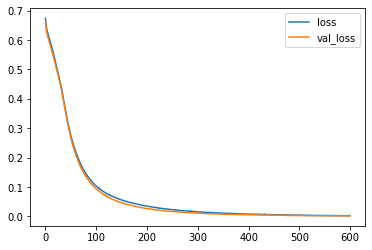

In [49]:
loss = pd.DataFrame(model.history.history)
loss.plot()

Our model did very well during training.

### Model Evaluation

In [50]:
predictions = model.predict_classes(X_test)

In [51]:
print(confusion_matrix(y_test, predictions))

[[200   0]
 [  0 143]]


In [52]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       143

    accuracy                           1.00       343
   macro avg       1.00      1.00      1.00       343
weighted avg       1.00      1.00      1.00       343



The model performed very well on the test dataset, achieving an accuracy of 99%. Further improvements
could possibly be made by tuning hyperparameters to figure out the optimal model structure. 